In [24]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (copied csv files locally)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combi_city_ride_df = pd.merge(ride_data, city_data,
                                 how='left', on='city')

# Display the data table for preview
combi_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
# Obtain the x and y coordinates for each of the three city types
    #URBAN
urban = combi_city_ride_df[combi_city_ride_df["type"] == "Urban"]
urban_nb_rides = urban.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
urban_drivers = urban.groupby(["city"]).mean()["driver_count"]*12
                              
    #SUBURBAN
suburban = combi_city_ride_df[combi_city_ride_df["type"] == "Suburban"]
suburban_nb_rides = suburban.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]
suburban_drivers = suburban.groupby (["city"]).mean()["driver_count"]*12         
                                  
    #RURAL
rural = combi_city_ride_df[combi_city_ride_df["type"] == "Rural" ]                         
rural_nb_rides = rural.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]
rural_drivers = rural.groupby (["city"]).mean()["driver_count"]*12
                           

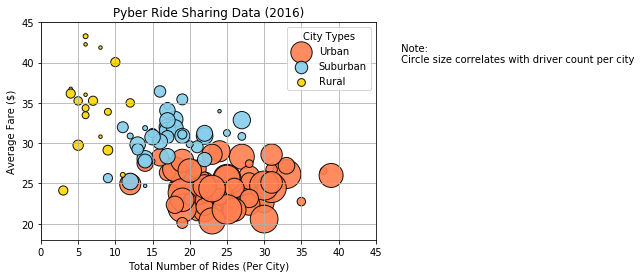

In [26]:
# Build the scatter plots for each city types
plt.scatter(urban_nb_rides, urban_avg_fare, s=urban_drivers, 
            facecolor="Coral",edgecolor="black", label="Urban", marker="o", alpha=0.9)
plt.scatter(suburban_nb_rides, suburban_avg_fare, s=suburban_drivers, 
            facecolor="SkyBlue",edgecolor="black", label="Suburban", marker="o",alpha=0.9)
plt.scatter(rural_nb_rides, rural_avg_fare, s=rural_drivers, 
            facecolor="Gold",edgecolor="black", label="Rural", marker="o", alpha=0.9)

# Incorporate the other graph properties & # Create a legend
plt.ylim(18,45)
plt.xlim(0,45)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid(True)
plt.legend(loc="best", title="City Types")

# Incorporate a text label regarding circle size
plt.text(48,40, " Note: \n Circle size correlates with driver count per city")

# Save Figure
plt.savefig("images/Scatter_PyberRideSharingData.png")


In [27]:
# Show plot
plt.show()

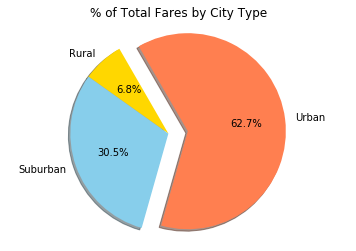

In [28]:
# Calculate Type Percents
Type_Percents = 100 * combi_city_ride_df.groupby(["type"]).sum()["fare"]/combi_city_ride_df["fare"].sum()

# Build Pie Chart
plt.pie(Type_Percents, explode=(0,0,0.2), shadow=True, startangle=120, autopct="%1.1f%%",
       labels=["Rural", "Suburban", "Urban"],
       colors=["Gold","Skyblue","Coral"])

plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/Pie_%totalfares_PyberRideSharingData.png")


In [29]:
# Show Figure
plt.show()

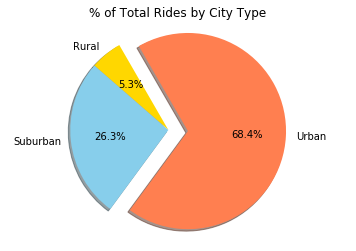

In [30]:
# Calculate Ride Percents
Ride_Percents = 100 * combi_city_ride_df.groupby(["type"]).count()["ride_id"]/combi_city_ride_df["ride_id"].count()

# Build Pie Chart
plt.pie(Ride_Percents, explode=[0,0,0.2],shadow=True, startangle=120, autopct="%1.1f%%",
       labels=["Rural", "Suburban", "Urban"],
       colors=["Gold","Skyblue","Coral"])

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/Pie_%totalrides_PyberRideSharingData.png")

In [31]:
# Show Figure
plt.show()

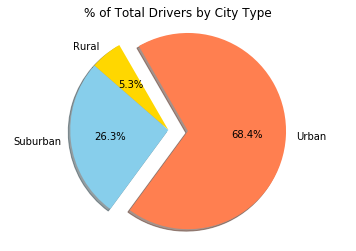

In [32]:
# Calculate Driver Percents
Ride_Percents = 100 * combi_city_ride_df.groupby(["type"]).count()["driver_count"]/combi_city_ride_df["driver_count"].count()

# Build Pie Charts
plt.pie(Ride_Percents, explode=[0,0,0.2],shadow=True, startangle=120, autopct="%1.1f%%",
       labels=["Rural", "Suburban", "Urban"],
       colors=["Gold","Skyblue","Coral"])

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/Pie_%totaldrivers_PyberRideSharingData.png")

In [23]:
# Show Figure
plt.show()